In [83]:
# Load all the libraries and packages and output which version is being loaded
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib 
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import datetime
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
#import ml_metrics as metrics
from sklearn import cross_validation
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline

scipy: 0.18.1
numpy: 1.11.3
matplotlib: 2.0.0
pandas: 0.19.2
sklearn: 0.18.1


In [84]:
!head -n2 datasets/claims-2002-2006_0.xls

PK     ! 71���  �   [Content_Types].xml �(�                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 �TKo�0�O��r����4Q8�qܐ`? 4�F�I�~nxhC@��ҨI�=۽����%4�梛uD�p��Y.���H��ժrr����]o���	G[�EI�_�Ģ�Za�<X>��P+��0�^s5���<��YK)5��{��ZT���x{�db�H^7��\(�+S(b�ri�I�SS�vŢf�} �����|0�F@��Pȣ�*��t�*��(K�񁭟`hNN���}�s�!�@��f�rU�����y�KSS���؝�3��2ʸto,���[t����^B�i!DZW�7v�mc.U ="������n�Aj��q�>��[3����瑧F��_aעMt��7�b�3�ȹ��`A3�4�#�2���/   �� PK     ! �U0#�   L   _rels/.rels �(�                     

In [85]:
df1 = pd.read_excel('datasets/claims-2002-2006_0.xls')
df1.head(2)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04 00:00:00,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.0,Approved,350.0,Approve in Full
1,0202417M,2002-02-02 00:00:00,2004-01-16 00:00:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.0,Settled,50.0,Settle


In [86]:
df2 = pd.read_excel('datasets/claims-2007-2009_0.xls')
df2.head(2)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,2007010518383,2007-01-01,2006-11-25 00:00:00,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Automobile Parts; Other,319.73,Denied,0.0,Deny
1,2007020620282,2007-01-02,2007-01-02 00:00:00,RDU,Raleigh-Durham International,Delta Air Lines,Passenger Property Loss,Checkpoint,Watches - Expensive more than $100,1995.00,Denied,0.0,Deny


In [87]:
# UDF for adding underscore between column_names of two words or more
def addUnderscore(current_columns):
    new_columns = []
    for item in current_columns:
        segments = item.split()
        new_columns.append('_'.join(segments))
    return new_columns

In [88]:
# Replace black space in columns names with underscore
df1.rename(columns=dict(zip(df1.columns.tolist(),addUnderscore(df1.columns.tolist()))), inplace=True)
df2.rename(columns=dict(zip(df2.columns.tolist(),addUnderscore(df2.columns.tolist()))), inplace=True)

In [89]:
df1.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
0,0909802M,2002-01-04 00:00:00,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2002-02-02 00:00:00,2004-01-16 00:00:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,2002-02-04 00:00:00,2003-11-26 00:00:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,2002-02-07 00:00:00,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18 00:00:00,2005-02-05 00:00:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,"Baby - Strollers, car seats, playpen, etc.",84.79,Approved,84.79,Approve in Full


In [90]:
df2.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
0,2007010518383,2007-01-01,2006-11-25 00:00:00,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Automobile Parts; Other,319.73,Denied,0.0,Deny
1,2007020620282,2007-01-02,2007-01-02 00:00:00,RDU,Raleigh-Durham International,Delta Air Lines,Passenger Property Loss,Checkpoint,Watches - Expensive more than $100,1995.00,Denied,0.0,Deny
2,2007020620284,2007-01-02,2006-12-05 00:00:00,BOS,Boston (Logan) International Airport,Jet Blue,Passenger Property Loss,Checked Baggage,Computer - Laptop,850.00,Denied,0.0,Deny
3,2008010937576,2007-01-02,2007-12-04 00:00:00,SJC,Norman Y Mineta San Jose International,Continental Airlines,Passenger Property Loss,Checked Baggage,Eyeglasses - (including contact lenses),350.00,Denied,0.0,Deny
4,2008010437392,2007-01-02,2007-12-22 00:00:00,LAS,McCarran International,Alaska Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,"Insufficient, one of the following items requi...",NaN,NaN


In [91]:
# Check to make sure both dataframe have the same columns
df2.columns.difference(df1.columns)

Index([], dtype='object')

In [92]:
df1.shape

(97231, 13)

In [93]:
# Combine both df1 and df2 into one dataframe df12
df12 = pd.concat([df1,df2])
df12.reset_index(drop=True, inplace=True)
df12.index

RangeIndex(start=0, stop=145143, step=1)

In [94]:
df12.shape

(145143, 13)

## Drop Rows Missing Target Variable

In [95]:
df12.Disposition.value_counts(dropna=False)

Deny               68382
Approve in Full    35010
Settle             27967
NaN                13784
Name: Disposition, dtype: int64

In [96]:
df12.drop(df12[df12.Disposition.isnull()].index).Disposition.value_counts()

Deny               68382
Approve in Full    35010
Settle             27967
Name: Disposition, dtype: int64

In [97]:
df12 = df12.drop(df12[df12.Disposition.isnull()].index)

In [98]:
df12.Disposition.value_counts()

Deny               68382
Approve in Full    35010
Settle             27967
Name: Disposition, dtype: int64

In [99]:
df12.Disposition.value_counts(normalize=True)

Deny               0.520573
Approve in Full    0.266522
Settle             0.212905
Name: Disposition, dtype: float64

In [100]:
df12.shape

(131359, 13)

In [101]:
df12.isnull().sum()

Claim_Number         0
Date_Received      119
Incident_Date      771
Airport_Code      4181
Airport_Name      4181
Airline_Name     28310
Claim_Type        5887
Claim_Site         277
Item              2893
Claim_Amount       766
Status               0
Close_Amount      1473
Disposition          0
dtype: int64

## Review Record Missing Airline_Name

Review pattern of records missing airline_name to see if there's a trend that could help fill in those values. And whether most of these records are only missing Airline_Name

In [102]:
df_missing_airline = df12[df12.Airline_Name.isnull()]
df_missing_airline.isnull().sum()

Claim_Number         0
Date_Received       42
Incident_Date      632
Airport_Code      2642
Airport_Name      2642
Airline_Name     28310
Claim_Type        2390
Claim_Site         109
Item               498
Claim_Amount       571
Status               0
Close_Amount       566
Disposition          0
dtype: int64

In [103]:
df_missing_airline.groupby('Disposition').Claim_Amount.describe()\
                    .unstack()\
                    .reindex(index = ['Approve in Full','Settle','Deny'])

,count,mean,std,min,25%,50%,75%,max
Disposition,,,,,,,,
Approve in Full,9670.0,1.546760e+02,3.899540e+02,0.0,30.000,62.495,146.975,1.167223e+04
Settle,7329.0,9.678612e+02,2.493934e+04,0.0,100.000,199.980,400.000,2.000000e+06
Deny,10740.0,2.800338e+08,2.894808e+10,0.0,94.255,229.855,625.000,3.000000e+12


Disposition
Approve in Full    Axes(0.125,0.125;0.775x0.755)
Deny               Axes(0.125,0.125;0.775x0.755)
Settle             Axes(0.125,0.125;0.775x0.755)
Name: Claim_Amount, dtype: object

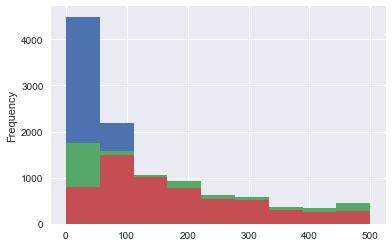

In [104]:
df_missing_airline.groupby('Disposition').Claim_Amount.plot(kind='hist',bins=np.linspace(0,500,10))

In [105]:
df_missing_airline.Airport_Code.value_counts().head()

LAX    1560
ORD     952
MIA     849
EWR     820
JFK     820
Name: Airport_Code, dtype: int64

In [106]:
df_missing_airline.Claim_Type.value_counts()

Property Damage            13622
Passenger Property Loss    11807
Personal Injury              196
Motor Vehicle                129
Employee Loss (MPCECA)        89
Passenger Theft               77
Name: Claim_Type, dtype: int64

In [107]:
df_missing_airline.Claim_Site.value_counts()

Checked Baggage    18917
Checkpoint          8237
Other                883
Motor Vehicle        163
Bus Station            1
Name: Claim_Site, dtype: int64

In [108]:
df_missing_airline.Item.value_counts().reset_index()

,index,Item
0,Other,7616
1,Luggage (all types including footlockers),4866
2,"Clothing - Shoes, belts, accessories, etc.",3268
3,Jewelry - Fine,1977
4,Locks,1718
5,Cameras - Digital,1615
6,Computer - Laptop,1574
7,Eyeglasses - (including contact lenses),1108
8,"Cosmetics - Perfume, toilet articles, medicine...",611
9,Cell Phones,560


In [109]:
df_missing_airline.count()

Claim_Number     28310
Date_Received    28268
Incident_Date    27678
Airport_Code     25668
Airport_Name     25668
Airline_Name         0
Claim_Type       25920
Claim_Site       28201
Item             27812
Claim_Amount     27739
Status           28310
Close_Amount     27744
Disposition      28310
dtype: int64

## Drop All Rows Missing Any Features

In [110]:
df12_final = df12.dropna()
df12_final.shape

(94848, 13)

In [111]:
df12_final.dtypes

Claim_Number      object
Date_Received     object
Incident_Date     object
Airport_Code      object
Airport_Name      object
Airline_Name      object
Claim_Type        object
Claim_Site        object
Item              object
Claim_Amount     float64
Status            object
Close_Amount     float64
Disposition       object
dtype: object

In [112]:
df12_final.head(2)

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
0,0909802M,2002-01-04 00:00:00,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
2,0202445M,2002-02-04 00:00:00,2003-11-26 00:00:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle


In [113]:
#df12_final['Date_Received'] = pd.to_datetime(df12_final.Date_Received)

In [114]:
df12_final[df12_final.Date_Received >= datetime.datetime(year=2010,month=1,day=1)].count()

Claim_Number     22
Date_Received    22
Incident_Date    22
Airport_Code     22
Airport_Name     22
Airline_Name     22
Claim_Type       22
Claim_Site       22
Item             22
Claim_Amount     22
Status           22
Close_Amount     22
Disposition      22
dtype: int64

In [115]:
df12_final[df12_final.Date_Received >= datetime.datetime(2010,1,1,0,0)].sort_values('Date_Received',ascending=False)

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
96972,2005110795652,3005-10-27 00:00:00,2005-09-29 00:00:00,IAH,Houston - George Bush Intercontinental Airport,Continental Airlines,Property Damage,Checked Baggage,Other,150.00,Denied,0.00,Deny
96971,2005050484040,3005-05-03 00:00:00,2005-04-03 00:00:00,PHL,Philadelphia International Airport,USAir,Property Damage,Checkpoint,Other,264.39,Approved,264.39,Approve in Full
96969,2005040481301,3005-03-30 00:00:00,2005-03-02 00:00:00,MCO,Orlando International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Computer - Laptop,2714.08,Denied,0.00,Deny
96968,2005040481403,3005-03-30 00:00:00,2005-03-20 00:00:00,SHV,Shreveport Regional,Northwest Airlines,Passenger Property Loss,Checked Baggage,Other,45.69,Approved,45.69,Approve in Full
96966,2006122718021,2996-12-26 00:00:00,2006-12-21 00:00:00,BUR,Bob Hope,Jet Blue,Passenger Property Loss,Checked Baggage,Currency; Other,1120.00,Denied,0.00,Deny
96964,2007043024691,2900-04-27 00:00:00,2007-02-02 00:00:00,SJC,Norman Y Mineta San Jose International,Continental Airlines,Passenger Property Loss,Checked Baggage,Other,66.95,Denied,0.00,Deny
96963,2005091992666,2500-09-08 00:00:00,2005-08-02 00:00:00,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Other,61.64,Settled,35.70,Settle
96962,2005032379434,2500-02-18 00:00:00,2005-01-29 00:00:00,HPN,"Westchester County, White Plains",American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),550.00,Settled,50.00,Settle
96961,2008080447940,2208-07-29 00:00:00,2008-07-12 00:00:00,MDW,Midway International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,"Clothing - Shoes, belts, accessories, etc.",65.00,Denied,0.00,Deny
96960,2007013119968,2207-01-26 00:00:00,2007-01-19 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),162.99,Approved,162.99,Approve in Full


In [116]:
df12_final=df12_final.drop(df12_final[df12_final.Date_Received >= datetime.datetime(year=2010,month=1,day=1)].index)

In [117]:
df12_final[df12_final.Date_Received >= datetime.datetime(year=2010,month=1,day=1)].count()

Claim_Number     0
Date_Received    0
Incident_Date    0
Airport_Code     0
Airport_Name     0
Airline_Name     0
Claim_Type       0
Claim_Site       0
Item             0
Claim_Amount     0
Status           0
Close_Amount     0
Disposition      0
dtype: int64

In [118]:
#df12_final['Incident_Date'] = pd.to_datetime(df12_final.Incident_Date)

In [119]:
df12_final[df12_final.Incident_Date.astype(str).str[:4].str.contains('-')].count()

Claim_Number     118
Date_Received    118
Incident_Date    118
Airport_Code     118
Airport_Name     118
Airline_Name     118
Claim_Type       118
Claim_Site       118
Item             118
Claim_Amount     118
Status           118
Close_Amount     118
Disposition      118
dtype: int64

In [120]:
df12_final[df12_final.Incident_Date.astype(str).str[:4].str.contains('-')].Incident_Date.head()

54198    17-MAR-0201 00:00
55085    20-JUN-0209 00:00
55218    09-DEC-0200 00:00
55887    23-DEC-0204 00:00
56041    25-JAN-0201 00:00
Name: Incident_Date, dtype: object

In [121]:
df12_final=df12_final.drop(df12_final[df12_final.Incident_Date.astype(str).str[:4].str.contains('-')].index)

In [122]:
df12_final[df12_final.Incident_Date.astype(str).str[:4].str.contains('-')].count()

Claim_Number     0
Date_Received    0
Incident_Date    0
Airport_Code     0
Airport_Name     0
Airline_Name     0
Claim_Type       0
Claim_Site       0
Item             0
Claim_Amount     0
Status           0
Close_Amount     0
Disposition      0
dtype: int64

In [123]:
df12_final['Date_Received'] = pd.to_datetime(df12_final.Date_Received)
df12_final['Incident_Date'] = pd.to_datetime(df12_final.Incident_Date)

In [124]:
df12_final.dtypes

Claim_Number             object
Date_Received    datetime64[ns]
Incident_Date    datetime64[ns]
Airport_Code             object
Airport_Name             object
Airline_Name             object
Claim_Type               object
Claim_Site               object
Item                     object
Claim_Amount            float64
Status                   object
Close_Amount            float64
Disposition              object
dtype: object

In [125]:
df12_final.count()

Claim_Number     94708
Date_Received    94708
Incident_Date    94708
Airport_Code     94708
Airport_Name     94708
Airline_Name     94708
Claim_Type       94708
Claim_Site       94708
Item             94708
Claim_Amount     94708
Status           94708
Close_Amount     94708
Disposition      94708
dtype: int64

In [126]:
df12_final['Days_Since_Incident'] = (df12_final['Date_Received'] -df12_final['Incident_Date'])/np.timedelta64(1, 'D')

In [127]:
df12_final[df12_final.Days_Since_Incident < 0].count()

Claim_Number           839
Date_Received          839
Incident_Date          839
Airport_Code           839
Airport_Name           839
Airline_Name           839
Claim_Type             839
Claim_Site             839
Item                   839
Claim_Amount           839
Status                 839
Close_Amount           839
Disposition            839
Days_Since_Incident    839
dtype: int64

In [128]:
df12_final[df12_final.Days_Since_Incident < 0].head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition,Days_Since_Incident
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full,-342.0
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle,-660.0
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333.0
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,"Baby - Strollers, car seats, playpen, etc.",84.79,Approved,84.79,Approve in Full,-1083.0
5,2005032479636,2002-02-18,2005-02-17,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle,-1095.0


In [129]:
df12_final[df12_final.Days_Since_Incident > 1000].Disposition.value_counts()

Deny               33
Approve in Full     9
Settle              4
Name: Disposition, dtype: int64

In [130]:
df12_final.Days_Since_Incident.describe()

count    94708.000000
mean        39.977576
std         77.954609
min      -1826.000000
25%         12.000000
50%         23.000000
75%         45.000000
max       2925.000000
Name: Days_Since_Incident, dtype: float64

In [131]:
df12_final.groupby('Disposition').Days_Since_Incident.describe()

Disposition           
Approve in Full  count    23142.000000
                 mean        39.219165
                 std         73.046430
                 min      -1822.000000
                 25%         14.000000
                 50%         25.000000
                 75%         45.000000
                 max       2250.000000
Deny             count    53183.000000
                 mean        40.100397
                 std         82.083883
                 min      -1826.000000
                 25%         11.000000
                 50%         22.000000
                 75%         44.000000
                 max       2925.000000
Settle           count    18383.000000
                 mean        40.577000
                 std         71.397133
                 min      -1095.000000
                 25%         14.000000
                 50%         25.000000
                 75%         46.000000
                 max       2256.000000
Name: Days_Since_Incident, dtype: float64

Disposition
Approve in Full    Axes(0.125,0.125;0.775x0.755)
Deny               Axes(0.125,0.125;0.775x0.755)
Settle             Axes(0.125,0.125;0.775x0.755)
Name: Days_Since_Incident, dtype: object

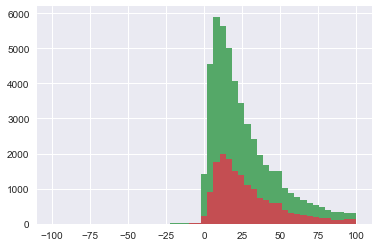

In [132]:
df12_final.groupby('Disposition').Days_Since_Incident.hist(bins=np.linspace(-100,100,50))

In [133]:
# Drop rows where Incident Date > Date Received
df12_final = df12_final.drop(df12_final[df12_final.Incident_Date > df12_final.Date_Received].index)

In [134]:
df12_final[df12_final.Days_Since_Incident < 0].count()

Claim_Number           0
Date_Received          0
Incident_Date          0
Airport_Code           0
Airport_Name           0
Airline_Name           0
Claim_Type             0
Claim_Site             0
Item                   0
Claim_Amount           0
Status                 0
Close_Amount           0
Disposition            0
Days_Since_Incident    0
dtype: int64

Disposition           
Approve in Full  count    22943.000000
                 mean        41.444272
                 std         65.456374
                 min          0.000000
                 25%         14.000000
                 50%         25.000000
                 75%         45.000000
                 max       2250.000000
Deny             count    52699.000000
                 mean        42.273604
                 std         76.912196
                 min          0.000000
                 25%         11.000000
                 50%         22.000000
                 75%         44.000000
                 max       2925.000000
Settle           count    18227.000000
                 mean        42.533968
                 std         66.183920
                 min          0.000000
                 25%         14.000000
                 50%         25.000000
                 75%         46.000000
                 max       2256.000000
Name: Days_Since_Incident, dtype: float64

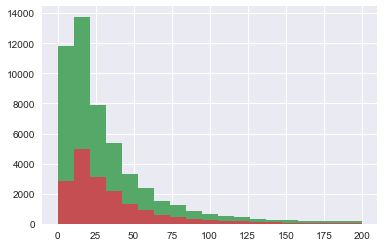

In [135]:
df12_final.groupby('Disposition').Days_Since_Incident.hist(bins=np.linspace(0,200,20))
print(df12_final.groupby('Disposition').Days_Since_Incident.describe())

## Label Items Not In Top 50 Item Categories as Other

In [136]:
df12_final.Item.count()

93869

In [137]:
df12_final.Item.value_counts().count()

3054

In [138]:
df12_final.Item.value_counts().head(50).sort_values()

Photographic Film                                                                                              94
Bags - Fabric, plastic, etc. (not purses); Cosmetics - Perfume, toilet articles, medicines, soaps, etc.       104
Paintings and Pictures (including frames, etchings, photos, etc)                                              106
Dental Equipment and Instruments                                                                              107
Locks; Other                                                                                                  124
MP3 Players-(iPods, etc); Other                                                                               126
Luggage (all types including footlockers); Other                                                              129
Bags - Fabric, plastic, etc. (not purses)                                                                     138
Computer - Laptop; Other                                                                

In [139]:
top50_items = df12_final.Item.value_counts().head(50).index.tolist()
top50_items

[u'Other',
 u'Luggage (all types including footlockers)',
 u'Clothing - Shoes, belts, accessories, etc.',
 u'Locks',
 u'Cameras - Digital',
 u'Jewelry - Fine',
 u'Computer - Laptop',
 u'Cosmetics - Perfume, toilet articles, medicines, soaps, etc.',
 u'Eyeglasses - (including contact lenses)',
 u'Currency',
 u'Cell Phones',
 u'DVD/CD Players',
 u'Medicines',
 u'MP3 Players-(iPods, etc)',
 u'Sporting Equipment & Supplies (footballs, parachutes, etc.)',
 u'Cameras - Digital; Cameras - Non-electronic (Camera supplies, lenses, projectors, etc.)',
 u'Jewelry - Costume',
 u'Watches - Expensive more than $100',
 u'Locks; Luggage (all types including footlockers)',
 u'GPS - Global Positioning System',
 u'Stereo Items & Accessories',
 u'Alcoholic beverages',
 u'Handbags & Purses (leather or fabric)',
 u'Baby - Strollers, car seats, playpen, etc.',
 u'Clothing - Shoes, belts, accessories, etc.; Luggage (all types including footlockers)',
 u'Musical Instruments - Other - Over $250',
 u'Clothing - 

In [140]:
len(top50_items)

50

In [141]:
df12_final[df12_final.Item.str.contains(';')].Item.value_counts().head(20).index

Index([u'Cameras - Digital; Cameras - Non-electronic (Camera supplies, lenses, projectors, etc.)',
       u'Locks; Luggage (all types including footlockers)',
       u'Clothing - Shoes, belts, accessories, etc.; Luggage (all types including footlockers)',
       u'Clothing - Shoes, belts, accessories, etc.; Other',
       u'Clothing - Shoes, belts, accessories, etc.; Cosmetics - Perfume, toilet articles, medicines, soaps, etc.',
       u'Cameras - Digital; Other', u'Jewelry - Costume; Jewelry - Fine',
       u'Cosmetics - Perfume, toilet articles, medicines, soaps, etc.; Other',
       u'Computer - Laptop; Other',
       u'Luggage (all types including footlockers); Other',
       u'MP3 Players-(iPods, etc); Other', u'Locks; Other',
       u'Bags - Fabric, plastic, etc. (not purses); Cosmetics - Perfume, toilet articles, medicines, soaps, etc.',
       u'Cosmetics - Perfume, toilet articles, medicines, soaps, etc.; Luggage (all types including footlockers)',
       u'Currency; Other',
 

In [142]:
df12_final[df12_final.Item.str.contains(';')]['Item'].value_counts().reset_index().head()

,index,Item
0,Cameras - Digital; Cameras - Non-electronic (C...,642
1,Locks; Luggage (all types including footlockers),533
2,"Clothing - Shoes, belts, accessories, etc.; Lu...",299
3,"Clothing - Shoes, belts, accessories, etc.; Other",289
4,"Clothing - Shoes, belts, accessories, etc.; Co...",273


In [143]:
df12_final[(~df12_final.Item.isin(top50_items)) & (~df12_final.Item.str.contains(';'))]\
                    .Item.value_counts().count()

93

In [144]:
df12_final[(~df12_final.Item.isin(top50_items)) & (~df12_final.Item.str.contains(';'))]\
                    .Item.value_counts().head(20).index.tolist()

[u'Professional Equipment',
 u'Automobile Parts',
 u'Bicycles',
 u'Video Recordings (blank & commercial)',
 u'Ceramics - Animals, etc.',
 u'Firearms',
 u'Lighters - (cigar, cigerette, etc.)',
 u'Toys - Other (including games, toys, play dolls etc.)',
 u"Electrical and Gas Appliances Minor - $200 or less (humidifiers, tv's, etc)",
 u'Tools - Power (including air tools, not in a vehicle)',
 u'Books - Other (Hardcover non-fiction)',
 u'Knick Knacks (bric-a-bracks)',
 u'Books - Reference books, cookbooks, etc.',
 u'Audio - Other (Phonograph, cassettes, etc)',
 u'Clocks - Inexpensive ($75.00 or less)',
 u'Musical Instruments - Other - Over $100 - $250',
 u'Binoculars',
 u'Candles - Decorative and other',
 u'Hearing Aids',
 u"Audio - CD's"]

In [145]:
df12_final.Item.count()

93869

In [146]:
df12_final[~df12_final.Item.isin(top50_items)].Item.value_counts().head()

Cosmetics - Perfume, toilet articles, medicines, soaps, etc.; Luggage (all types including footlockers)    92
Professional Equipment                                                                                     90
Automobile Parts                                                                                           86
Bicycles                                                                                                   83
Currency; Other                                                                                            80
Name: Item, dtype: int64

In [147]:
matching = [s for s in top50_items if ";" in s]
matching

[u'Cameras - Digital; Cameras - Non-electronic (Camera supplies, lenses, projectors, etc.)',
 u'Locks; Luggage (all types including footlockers)',
 u'Clothing - Shoes, belts, accessories, etc.; Luggage (all types including footlockers)',
 u'Clothing - Shoes, belts, accessories, etc.; Other',
 u'Clothing - Shoes, belts, accessories, etc.; Cosmetics - Perfume, toilet articles, medicines, soaps, etc.',
 u'Cameras - Digital; Other',
 u'Jewelry - Costume; Jewelry - Fine',
 u'Cosmetics - Perfume, toilet articles, medicines, soaps, etc.; Other',
 u'Computer - Laptop; Other',
 u'Luggage (all types including footlockers); Other',
 u'MP3 Players-(iPods, etc); Other',
 u'Locks; Other',
 u'Bags - Fabric, plastic, etc. (not purses); Cosmetics - Perfume, toilet articles, medicines, soaps, etc.']

In [148]:
#df12_final = df12_final[df12_final.Item.isin(top50_items)]
df12_final.loc[df12_final[~df12_final.Item.isin(top50_items)].index,'Item'] = 'Minor Categories'

In [149]:
len(df12_final.Item.unique())

51

In [150]:
df12_final.Item.value_counts().count()

51

In [151]:
airport_values = df12_final.Airport_Code.value_counts()
airport_values[airport_values > 9].count()

254

In [152]:
df12_final.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition,Days_Since_Incident
21,16410,2002-07-24,2002-07-10,SDF,Louisville International,Delta Air Lines,Passenger Property Loss,Checkpoint,Luggage (all types including footlockers),600.00,Settled,337.40,Settle,14.0
25,0702564M,2002-08-19,2002-06-22,BWI,Baltimore/Washington Intl Thurgood Marshall,America West,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),354.93,Settled,301.69,Settle,58.0
26,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.00,Approve in Full,40.0
30,17892,2002-09-09,2002-08-23,RDU,Raleigh-Durham International,USAir,Property Damage,Checkpoint,Luggage (all types including footlockers),30.00,Approved,30.00,Approve in Full,17.0
45,18301,2002-09-18,2002-08-14,JFK,John F. Kennedy International,UAL,Passenger Property Loss,Checkpoint,Cell Phones,213.00,Settled,74.55,Settle,35.0


# Feature Engineering Steps

### Drop Non Feature Columns

In [153]:
# drop columns that are not features or are redundant
def dropNonFeatures(df):
    df.drop(['Claim_Number','Airport_Name','Status','Close_Amount'], axis=1, inplace=True)
    return df

### Convert Target Into Numeric Variable

In [154]:
def codeTarget(df):
    targetDict = {'Deny':0, 'Settle': 1, 'Approve in Full': 2}
    df['Disposition_Code'] = df['Disposition'].map(targetDict)
    df.drop('Disposition', axis=1, inplace=True)
    return df

### One-hot-encode Categorical Variables

In [155]:
def one_hot_encode(df):
    df = pd.get_dummies(df)
    return df

### First Order Feature Engineering

In [156]:
def first_order_feature_engineering(df):
    df = dropNonFeatures(df)
    df = codeTarget(df)
    df = one_hot_encode(df)
    return df

### Second Order Feature Engineering

In [161]:
def second_order_feature_engineering(df):
    df.drop(['Date_Received','Incident_Date'],axis=1,inplace=True)
    return df

In [162]:
df12_final.head()

,Date_Received,Incident_Date,Claim_Amount,Days_Since_Incident,Disposition_Code,Airport_Code_ABE,Airport_Code_ABI,Airport_Code_ABQ,Airport_Code_ABR,Airport_Code_ABY,...,Item_Other,Item_PDA - Personal Data Assistants,"Item_Paintings and Pictures (including frames, etchings, photos, etc)",Item_Photographic Film,"Item_Sporting Equipment & Supplies (footballs, parachutes, etc.)",Item_Stereo Items & Accessories,Item_Tools - Manual (not in a vehicle),"Item_Toys (game systems, cartridges, radio controlled cars, etc.)",Item_Watches - Expensive more than $100,Item_Watches - Inexpensive $100 or less
21,2002-07-24,2002-07-10,600.00,14.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,2002-08-19,2002-06-22,354.93,58.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,2002-08-21,2002-07-12,21.44,40.0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30,2002-09-09,2002-08-23,30.00,17.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,2002-09-18,2002-08-14,213.00,35.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
df12_final = first_order_feature_engineering(df12_final)
df12_final = second_order_feature_engineering(df12_final)

In [164]:
len(df12_final)

93869

In [165]:
df12_final.head()

,Claim_Amount,Days_Since_Incident,Disposition_Code,Airport_Code_ABE,Airport_Code_ABI,Airport_Code_ABQ,Airport_Code_ABR,Airport_Code_ABY,Airport_Code_ACK,Airport_Code_ACT,...,Item_Other,Item_PDA - Personal Data Assistants,"Item_Paintings and Pictures (including frames, etchings, photos, etc)",Item_Photographic Film,"Item_Sporting Equipment & Supplies (footballs, parachutes, etc.)",Item_Stereo Items & Accessories,Item_Tools - Manual (not in a vehicle),"Item_Toys (game systems, cartridges, radio controlled cars, etc.)",Item_Watches - Expensive more than $100,Item_Watches - Inexpensive $100 or less
21,600.00,14.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,354.93,58.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,21.44,40.0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30,30.00,17.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,213.00,35.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
df12_final.values

array([[  6.00000000e+02,   1.40000000e+01,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.54930000e+02,   5.80000000e+01,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.14400000e+01,   4.00000000e+01,   2.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  2.55000000e+01,   1.60000000e+01,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.00000000e+01,   1.45833333e+01,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.22895000e+03,   3.96111111e+01,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [167]:
arrayX = df12_final.drop('Disposition_Code',axis=1).values
arrayY = df12_final['Disposition_Code'].values
X = arrayX
y = arrayY
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
    test_size=test_size, random_state=seed)

In [680]:
# X = df12_final.drop(['Disposition_Code','Date_Received','Incident_Date'], axis=1)
# y = df12_final['Disposition_Code']
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
#     test_size=0.3, random_state=20)

In [168]:
# print(X_train.columns.difference(X_test.columns))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [169]:
from sklearn.linear_model import Lasso, Ridge  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation

In [174]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train) 
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LASSO', Lasso())) 
models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier())) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier()))
models.append(('SVC', SVC()))

In [175]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [176]:
logreg = LogisticRegression()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
cv_results = cross_validation.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=scoring)

In [ ]:
from sklearn.linear_model import Lasso, Ridge  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train) 
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier())) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier()))
models.append(('SVC', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, y_train, cv=kfold,
        scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.575744 (0.005789)


/Users/zohaib/anaconda/envs/py27_ds_dt_13/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/zohaib/anaconda/envs/py27_ds_dt_13/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [657]:
# len(df12_final.columns)

661

In [500]:
# len(pd.get_dummies(df12_final).columns.tolist())
# pd.get_dummies(df12_final).columns.tolist()

662

In [494]:
# len(df12_final.Airport_Code.unique()) + len(df12_final.Claim_Site.unique()) + len(df12_final.Airline_Name.unique())\
# + len(df12_final.Claim_Type.unique()) + len(df12_final.Item.unique())

656

In [659]:
df12_final.Disposition_Code.value_counts(normalize=True)

0    0.561410
2    0.244415
1    0.194175
Name: Disposition_Code, dtype: float64

In [490]:
# df12_final = codeTarget(df12_final)
# df12_final.Disposition_Code.value_counts(normalize=True)

0    0.561410
2    0.244415
1    0.194175
Name: Disposition_Code, dtype: float64

In [388]:
# df12_final['Disposition'] = df12_final['Disposition'].astype('category')
# df12_final['Disposition_Code'] = df12_final.Disposition.cat.codes
# df12_final.dtypes

In [406]:
# df12_final.groupby('Disposition').Disposition_Code.mean()

Disposition
Approve in Full    2
Deny               0
Settle             1
Name: Disposition_Code, dtype: int64

In [489]:
# df12_final = dropNonFeatures(df12_final)
# df12_final.head()

ValueError: labels ['Claim_Number' 'Airport_Name' 'Status'] not contained in axis